## Практическое задание

Вариант 1. 

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки


In [19]:
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense 
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
# конвертация чисел из uint8 в float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# нормализация данных [0, 1]
train_images /= 255 
test_images /= 255 

# трансформация лейблов в one-hot encoding
train_labels = to_categorical(train_labels, 10) 
test_labels = to_categorical(test_labels, 10) 

# изменение размерности массива в 4D массив
train_images = train_images.reshape(train_images.shape[0], 28,28,1)
test_images = test_images.reshape(test_images.shape[0], 28,28,1)

In [6]:
print(train_images.shape)  
print(train_labels.shape) 
print(test_images.shape)   
print(test_labels.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
# инициализация пустой модели
model = Sequential()

# первый сверточный слой
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

# второй пуллинговый слой
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# третий сверточный слой
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# четвертый пуллинговый слой
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# пятый полносвязный слой
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# сглаживание CNN выхода чтобы можно было его присоединить к полносвязному слою
model.add(Flatten())

# шестой полносвязный слой
model.add(Dense(84, activation='tanh'))

# выходной слой с функцией активации softmax
model.add(Dense(10, activation='softmax'))

# компилияция модели
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

hist = model.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=1)

test_score = model.evaluate(test_images, test_labels)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

Epoch 1/10
237/237 [==============================] - 45s 189ms/step - loss: 1.1273 - accuracy: 0.6346 - val_loss: 0.7706 - val_accuracy: 0.7223
Epoch 2/10
237/237 [==============================] - 45s 191ms/step - loss: 0.6876 - accuracy: 0.7463 - val_loss: 0.6849 - val_accuracy: 0.7430
Epoch 3/10
237/237 [==============================] - 44s 185ms/step - loss: 0.6120 - accuracy: 0.7735 - val_loss: 0.6274 - val_accuracy: 0.7563
Epoch 4/10
237/237 [==============================] - 46s 192ms/step - loss: 0.5715 - accuracy: 0.7888 - val_loss: 0.5882 - val_accuracy: 0.7844
Epoch 5/10
237/237 [==============================] - 41s 174ms/step - loss: 0.5432 - accuracy: 0.8025 - val_loss: 0.5669 - val_accuracy: 0.7913
Epoch 6/10
237/237 [==============================] - 41s 175ms/step - loss: 0.5212 - accuracy: 0.8118 - val_loss: 0.5553 - val_accuracy: 0.7953
Epoch 7/10
237/237 [==============================] - 50s 209ms/step - loss: 0.5030 - accuracy: 0.8195 - val_loss: 0.5227 - val_ac

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 5880)              0         
_________________________________________________________________
dense (Dense)                (None, 84)                4

In [9]:
y_pred=model.predict(test_images)

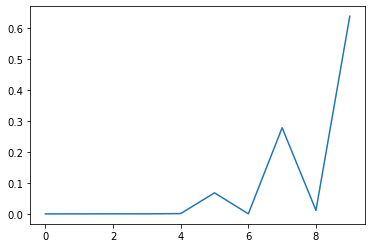

[6.7189067e-05 1.9100614e-04 4.3472255e-04 2.6990825e-04 1.1156462e-03
 6.8161920e-02 3.4963817e-04 2.7863896e-01 1.1616650e-02 6.3915443e-01]


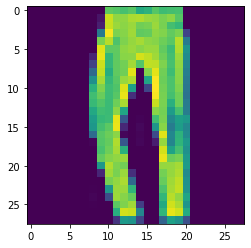

In [13]:
plt.plot(y_pred[0][:])
plt.show()
print(y_pred[0][:])
plt.imshow(test_images[5][:,:,0])
plt.show()

#### Оценка роста точности при увеличении ширины сети (больше ядер)

In [17]:
for kernels in (1, 2, 4, 8, 16, 32, 64):

  model = Sequential([
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding='same'),
      AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
      Conv2D(kernels, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
      Flatten(),
      Dense(84, activation='tanh'),
      Dense(10, activation='softmax')
  ])

  model.compile(loss=keras.losses.categorical_crossentropy, 
                optimizer='SGD', 
                metrics=["accuracy"])

  test_score = model.evaluate(test_images, test_labels, verbose=0)

  hist = model.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=0)
  
  hist2 = model.evaluate(train_images, train_labels, verbose=0)
  h_test = model.evaluate(test_images, test_labels, verbose=0)

  print(f"{kernels} kernels accuracy:")
  print(f"\tTrain: {hist2[1]}")
  print(f"\tTest: {h_test[1]}")

1 kernels accuracy:
	Train: 0.7049000263214111
	Test: 0.7014999985694885
2 kernels accuracy:
	Train: 0.7700833082199097
	Test: 0.760699987411499
4 kernels accuracy:
	Train: 0.7932500243186951
	Test: 0.7785000205039978
8 kernels accuracy:
	Train: 0.8113666772842407
	Test: 0.8015999794006348
16 kernels accuracy:
	Train: 0.8340833187103271
	Test: 0.8227999806404114
32 kernels accuracy:
	Train: 0.8412666916847229
	Test: 0.8270000219345093
64 kernels accuracy:
	Train: 0.8320666551589966
	Test: 0.819100022315979


#### По результатам видно, что при увеличении ширины до 32 ядер точность растет, потом начинает падать (?)

#### Оценка роста точности при увеличении глубины сети (больше слоев)

In [20]:
# Повторим первую модель в 3 версиях - 1,2,3 слоя

one_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

two_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

three_model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    Flatten(),
    Dense(64, activation='tanh'),
    Dense(10, activation='softmax')
])

In [21]:
for model_name in (one_model, two_model, three_model):

  # compile
  model_name.compile(loss=keras.losses.categorical_crossentropy,
                optimizer='SGD', 
                metrics=["accuracy"])
  
  # calc errors
  test_score = model_name.evaluate(test_images, test_labels, verbose=0)
 
  # fitting
  hist = model_name.fit(x=train_images,y=train_labels, epochs=10, batch_size=254, validation_data=(test_images, test_labels), verbose=0)
  
  hist2 = model_name.evaluate(train_images, train_labels, verbose=0)
  h_test = model_name.evaluate(test_images, test_labels, verbose=0)

  print(f"{model_name} accuracy:")
  print(f"\tTrain: {hist2[1]}")
  print(f"\tTest: {h_test[1]}")

<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021EF2AA9DC0> accuracy:
	Train: 0.8439000248908997
	Test: 0.8292999863624573
<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021EF2AA9F70> accuracy:
	Train: 0.8597666621208191
	Test: 0.8452000021934509
<tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021EF07ED0D0> accuracy:
	Train: 0.8428000211715698
	Test: 0.8309000134468079


#### При увеличении количества слоев точность растет, потом падает.